<h1>Model Development</h1>

<p>Lets develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.</p>


<p>We often use <b>Model Development</b> to help us predict future observations from the data we have.</p>

<p>A Model will help us understand the exact relationship between different variables and how these variables are used to predict the result.</p>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = 'Processed_data.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized_losses,make,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,peak_rpm,city_mpg,highway_mpg,price,city_L/100km,horsepower-binned,diesel,gas,aspiration_std,aspiration_turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,27,16500,11.190476,Low,0,1,1,0
1,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,26,16500,12.368421,Medium,0,1,1,0
2,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,30,13950,9.791667,Low,0,1,1,0
3,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,22,17450,13.055556,Low,0,1,1,0
4,2,161.0,audi,two,sedan,fwd,front,99.8,0.851994,0.920833,...,5500.0,19,25,15250,12.368421,Low,0,1,1,0


In [14]:
# path of data 


<h3> Linear Regression and Multiple Linear Regression</h3>

<h4>Linear Regression</h4>


<p>One example of a Data  Model that we will be using is</p>
<b>Simple Linear Regression</b>.

<br>
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>



$$
 Y: Response \ Variable\\
 X: Predictor \ Variables
$$


 <b>Linear function:</b>
$$
Yhat = a + b  X
$$

<ul>
    <li>a refers to the <b>intercept</b> of the regression line, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>

In [15]:
#Lets load the modules for linear regression
from sklearn.linear_model import LinearRegression
#Create the linear regression object
lm = LinearRegression()
lm

LinearRegression()

Lets create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable to see whether highway-mpg would help us to predict the car price

In [16]:
X = df[['highway_mpg']]
Y = df['price']
#Fit the linear model using highway-mpg
lm.fit(X,Y)

LinearRegression()

 We can output a prediction 

In [17]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16254.26934067, 17077.0977727 , 13785.78404458, 20368.41150083,
       17899.92620473])

<h4>Lets get the value of intercept (a) and Slope (b)</h4>

In [18]:
print(lm.intercept_)
print(lm.coef_)

38470.637005496676
[-822.82843203]


Plugging in the actual values we get:

<b>price</b> = 38423.31 - 821.73 x  <b>highway-mpg</b>

Lets create a linear function with "engine-size" as the predictor variable and the "price" as the response variable to see whether engine-size would help us to predict the car price

In [19]:
lm1 = LinearRegression()
X = df[['engine_size']]
Y = df['price']
lm1.fit(X,Y)

LinearRegression()

In [20]:
Yhat=lm1.predict(X)
Yhat[0:5]   

array([13729.63711709, 17400.60417954, 10225.53219385, 14730.80995231,
       14730.80995231])

In [21]:
print(lm1.intercept_)
print(lm1.coef_)

-7962.440979163088
[166.8621392]


Plugging in the values ,we get

<b>price</b> = -7963.338906281049 + 166.86001569 x <b>engine-size</b>

<h4>Multiple Linear Regression</h4>

<p>This method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.
Most of the real-world regression models involve multiple predictors.

$$
Y: Response \ Variable\\
X_1 :Predictor\ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
X_3: Predictor\ Variable \ 3\\
X_4: Predictor\ Variable \ 4\\
$$

$$
a: intercept\\
b_1 :coefficients \ of\ Variable \ 1\\
b_2: coefficients \ of\ Variable \ 2\\
b_3: coefficients \ of\ Variable \ 3\\
b_4: coefficients \ of\ Variable \ 4\\
$$

The equation is given by

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

<p>From the previous section  we know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>
Let's develop a model using these variables as the predictor variables.

In [22]:
Z = df[['horsepower', 'curb_weight', 'engine_size', 'highway_mpg']]
#Fit the linear model
lm.fit(Z, df['price'])

LinearRegression()

In [23]:
print(lm.intercept_)
print(lm.coef_)

-15814.43913901131
[53.64350321  4.70621169 81.46397065 36.26760488]


<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>

<h3>  Model Evaluation using Visualization</h3>

To evaluate our models and to choose the best one? One way to do this is by using visualization.

In [24]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline

<h3>Regression Plot</h3>

<p>When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using <b>regression plots</b>.</p>

<p>This plot will show a combination of a scattered data points (a <b>scatter plot</b>), as well as the fitted <b>linear regression</b> line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).</p>

 Let's visualize Horsepower as potential predictor variable of price:

(0.0, 47543.28417403393)

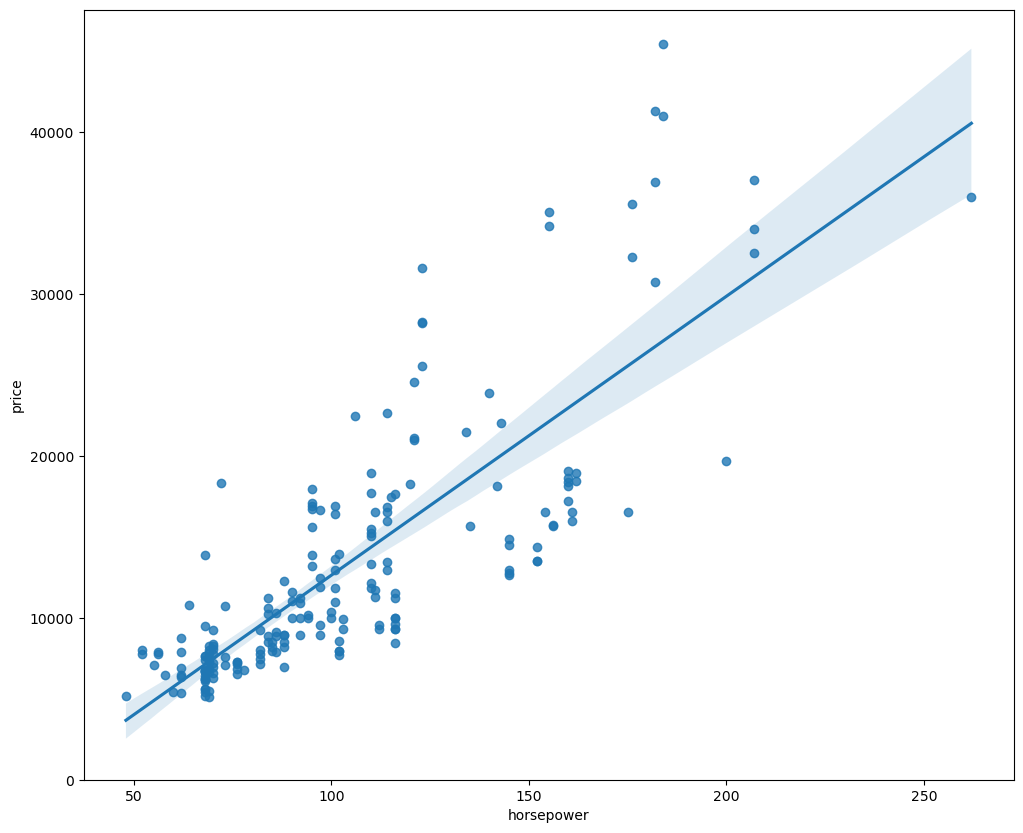

In [25]:
width=12
height=10
plt.figure(figsize = (width,height))
sns.regplot(x='horsepower',y='price',data=df)
plt.ylim(0,)


<p>We can see from this plot that <b>price is negatively correlated to highway-mpg, since the regression slope is negative</b>
One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data, and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data. 
    
<p>Let's compare this plot to the regression plot of "peak-rpm".</p>

(0.0, 47414.1)

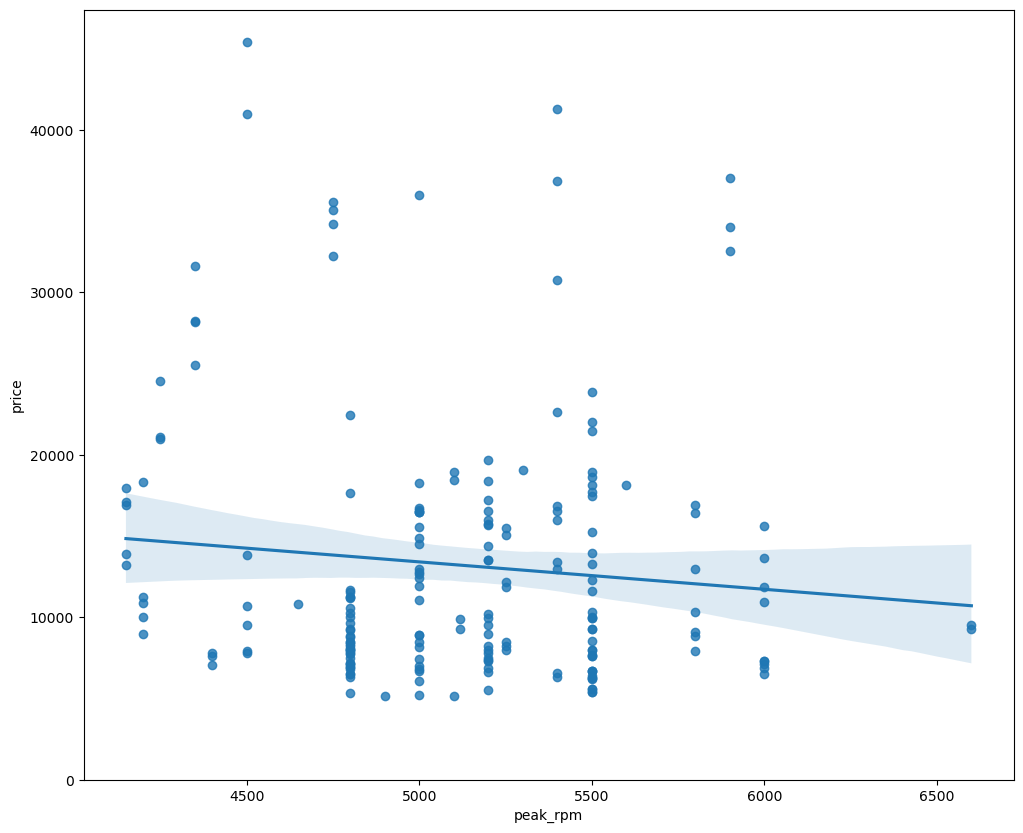

In [26]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak_rpm", y="price", data=df)
plt.ylim(0,)

<p>Comparing the regression plot of "peak-rpm" and "highway-mpg" we see that the points for "highway-mpg" are much closer to the generated line and on the average decrease. The points for "peak-rpm" have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases.</p>

In [27]:
 df[['peak_rpm','highway_mpg','price']].corr()

,peak_rpm,highway_mpg,price
peak_rpm,1.000000,-0.059326,-0.101519
highway_mpg,-0.059326,1.000000,-0.705115
price,-0.101519,-0.705115,1.000000


The variable "peak-rpm" has a stronger correlation with "price", it is approximate -0.704692  compared to   "highway-mpg" which is approximate -0.101616.

<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p><b>Residual</b> : The difference between the observed value (y) and the predicted value. It is the distance from the data point to the fitted regression line. (Yhat) is called the residual</p>

<p><b>Residual plot</b> : It is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>
<p>We should always look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data ( Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data )

(0.0, 33131.371902807296)

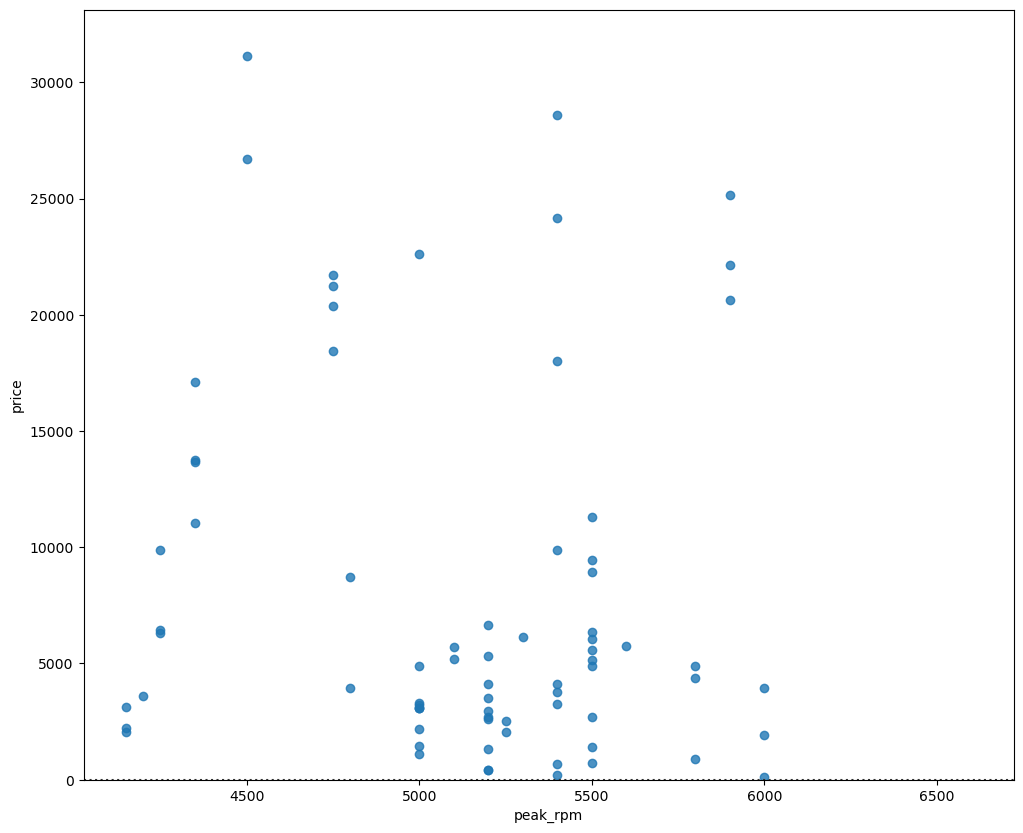

In [28]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.residplot(x="peak_rpm", y="price", data=df)
plt.ylim(0,)

<p>We can see from this residual plot - residuals are not randomly spread around the x-axis,thus a non-linear model is more appropriate for this data.</p>

<h3>Multiple Linear Regression</h3>

<p>Visualizing a model for Multiple Linear Regression<p>
<p><b> Distribution plot</b> : Compare the distribution of the fitted values that result from the model and distribution of the actual values.</p>

C:\Users\sumuk\AppData\Local\Temp\ipykernel_11868\1347949636.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1=sns.distplot(df['price'],hist=False,color="r",label="Actual Values")
C:\Users\sumuk\AppData\Local\Temp\ipykernel_11868\1347949636.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

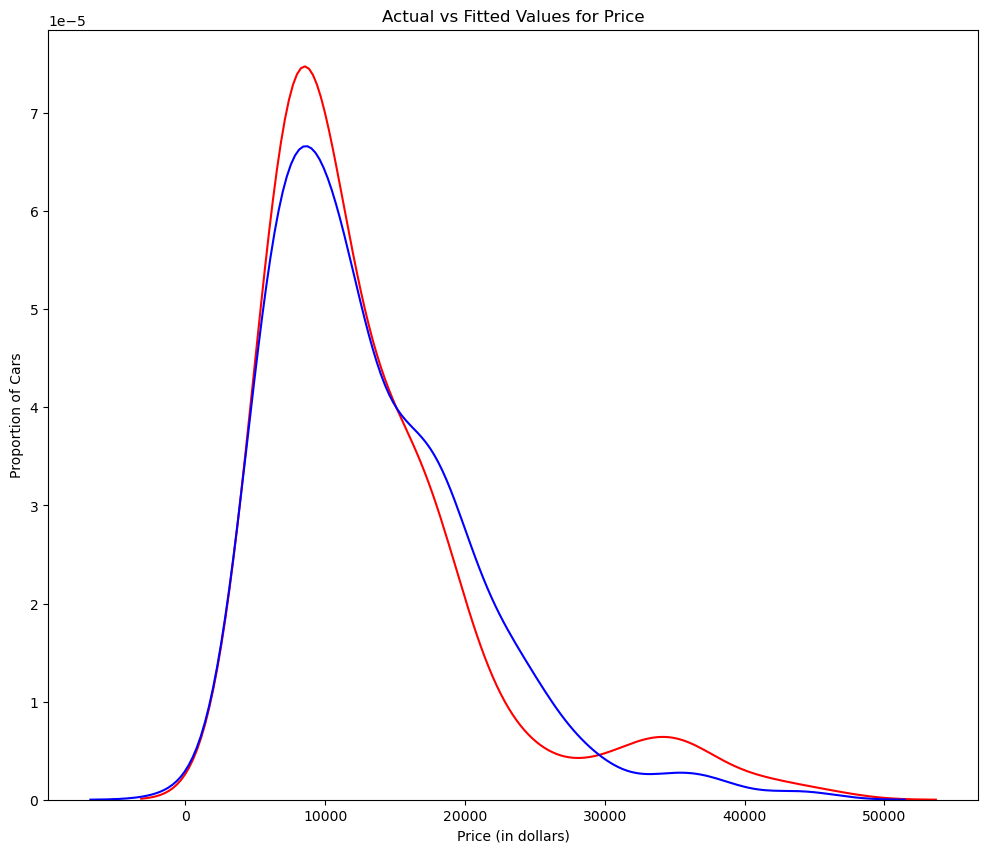

In [29]:
Yhat = lm.predict(Z)
plt.figure(figsize=(width,height))
ax1=sns.distplot(df['price'],hist=False,color="r",label="Actual Values")
sns.distplot(Yhat,hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title("Actual vs Fitted Values for Price")
plt.xlabel("Price (in dollars)")
plt.ylabel("Proportion of Cars")

plt.show()
plt.close()


<p>We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>

<h2>Polynomial Regression and Pipelines</h2>

<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.
<p>There are different orders of polynomial regression:</p>

<center><b>Quadratic - 2nd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 
$$


<center><b>Cubic - 3rd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 +b_3 X^3\\
$$


<center><b>Higher order</b>:</center>
$$
Y = a + b_1 X^2 +b_2 X^2 +b_3 X^3 ....\\
$$

<p>A linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.</p>

In [30]:
#We will use the following function to plot the data:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [31]:
x = df['highway_mpg']
y = df['price']
#Let's fit the polynomial using the function polyfit,then use the function to display the polynomial function.
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.552 x + 204.2 x - 8948 x + 1.378e+05


 Let's plot the function 

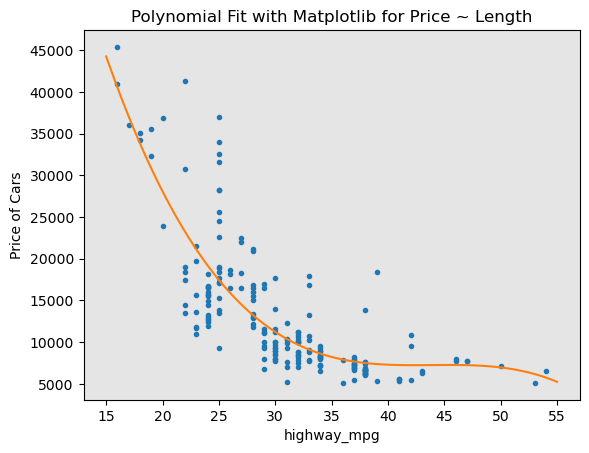

In [32]:
PlotPolly(p, x, y, 'highway_mpg')

In [33]:
np.polyfit(x, y, 3)

array([-1.55173297e+00,  2.04232144e+02, -8.94817574e+03,  1.37751367e+05])

<p>We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.</p>

        3         2
-1.552 x + 204.2 x - 8948 x + 1.378e+05


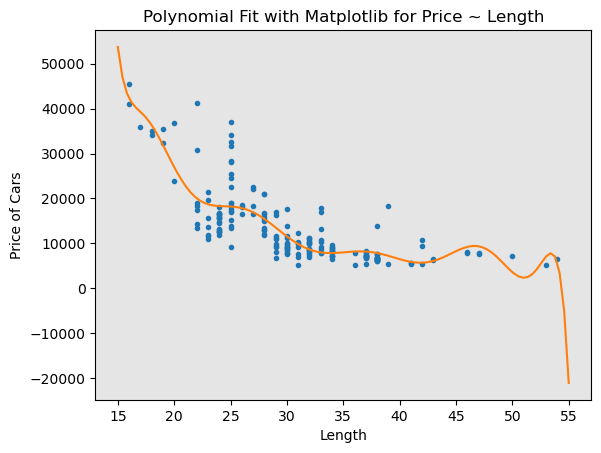

In [34]:
#Create 11 order polynomial model with the variables x and y from above
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p)
PlotPolly(p1,x,y, 'Length')

<p>The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2)polynomial with two variables is given by:</p>

$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$

We can perform a polynomial transform on multiple features. 

In [35]:
#import the module
from sklearn.preprocessing import PolynomialFeatures
#create a PolynomialFeatures object of degree 2 
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [36]:
Z_pr=pr.fit_transform(Z)

The original data is of 201 samples and 4 features 

In [37]:
Z.shape

(200, 4)

After the transformation, there are 201 samples and 15 features

In [38]:
Z_pr.shape

(200, 15)

<h2>Pipeline</h2>

<p>Data Pipelines simplify the steps of processing the data.

In [39]:
#Use the module Pipeline to create a pipeline and also use StandardScaler as a step in our pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [40]:
#create the pipeline by creating a list of tuples including the name of the model/estimator & its corresponding constructor.
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [41]:
#Input the list as an argument to the pipeline constructor 
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [42]:
#Normalize the data and perform a transform and fit the model simultaneously
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [43]:
#Normalize the data, perform a transform and produce a prediction  simultaneously
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13095.64294486, 18226.1683919 , 10389.2689322 , 16122.24836083])

<p> Lets create a pipeline that Standardizes the data, then perform prediction using a linear regression model using the features Z and targets y</p>

In [44]:
Input = [('scale',StandardScaler()),('model',LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(Z,y)
ypipe = pipe.predict(Z)
ypipe[0:10]

array([13700.95861278, 19057.77721438, 10623.21584883, 15521.89285072,
       13870.60904457, 15456.60238304, 15974.2856686 , 17616.15282997,
       10724.80104792, 10724.80104792])

<h2> Measures for In-Sample Evaluation</h2>

<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    
<b>R-squared</b> : R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>

<b>Mean Squared Error (MSE)</b> : The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).</p>

<h3>Model 1: Simple Linear Regression</h3>

* Let's calculate the R^2

In [45]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
lm.score(X, Y)

0.7609714051425501

We can say that ~ 49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

* Let's calculate the MSE

In [46]:
#We can predict the output i.e., "yhat" using the predict method, where X is the input variable:
Yhat=lm.predict(X)
Yhat[0:4]

array([13729.63711709, 17400.60417954, 10225.53219385, 14730.80995231])

In [47]:
#import the function mean_squared_error from the module metrics
from sklearn.metrics import mean_squared_error
#compare the predicted results with the actual results
mse = mean_squared_error(df['price'], Yhat)
mse

15095957.75971693

<h3>Model 2: Multiple Linear Regression</h3>

* Let's calculate the R^2

In [48]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
lm.score(Z, df['price'])

0.8094411114508352

We can say that ~ 80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

* Let's calculate the MSE

In [49]:
# Produce a prediction 
Y_predict_multifit = lm.predict(Z)
# Compare the predicted results with the actual results
# The mean square error of price and predicted value using multifit is: 
mean_squared_error(df['price'], Y_predict_multifit)

12034831.790700044

<h3>Model 3: Polynomial Fit</h3>

* Let's calculate the R^2

let’s import the function <b>r2_score</b> from the module <b>metrics</b> as we are using a different function

In [50]:
from sklearn.metrics import r2_score

We apply the function to get the value of r^2

In [51]:
r_squared = r2_score(y, p(x))
r_squared

0.6742706265540406

We can say that ~ 67.419 % of the variation of price is explained by this polynomial fit

<h3>MSE</h3>

We can also calculate the MSE:  

In [52]:
mean_squared_error(df['price'], p(x))

20571584.18879443

<h2>Prediction and Decision Making</h2>
<h3>Prediction</h3>

<p>We trained the model using the method <b>fit</b>. Now we will use the method <b>predict</b> to produce a prediction.</p>
<p>Lets import <b>pyplot</b> for plotting; we will also be using some functions from numpy.</p>

In [53]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

Create a new input 

In [54]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

 Fit the model 

In [55]:
lm.fit(X, Y)
lm

LinearRegression()

Produce a prediction

In [56]:
yhat=lm.predict(new_input)
yhat[0:5]

c:\Users\sumuk\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-7795.57883996, -7628.71670076, -7461.85456156, -7294.99242236,
       -7128.13028315])

Plot the data 

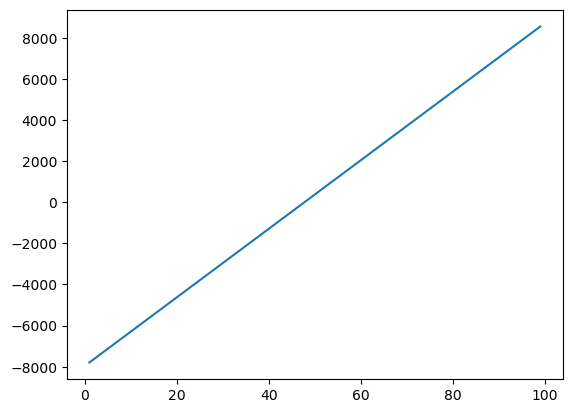

In [57]:
plt.plot(new_input, yhat)
plt.show()

<h3>Decision Making: Determining a Good Model Fit</h3>

* <b>Model with the higher R-squared value is a better fit</b> for the data.

* <b>Model with the smallest MSE value is a better fit</b> for the data.</p>


<h4>Let's take a look at the values for the different models.</h4>

<p><b>Simple Linear Regression</b> : Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>
    
<p><b>Multiple Linear Regression</b> : Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>
    
<p><b>Polynomial Fit</b> : Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>

<h2>Conclusion:</h2>

<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.</p>